# The K-Nearest Neighbors (KNN)
--------

Import Modules

In [1]:
from Modules import *

Reading, cleaning and splitting the data

In [4]:
df = pd.read_csv('../data/breastcancer.csv')
print(f"The shape of the Dataframe is {df.shape}\n {'-- '*50} ")
# -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- 
df = df.astype({'class' : 'category', 'id' : 'category'})             # chaning type to category
df.drop_duplicates(keep = 'first', inplace = True)                    # removing dublicates
df.dropna(how = 'any', inplace = True)                                # dropping NaNs
df.head()

The shape of the Dataframe is (629, 11)
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --  


,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,1246562,10,2,2,1,2,6.0,1,1,2,1
1,822829,7,6,4,8,10,10.0,9,5,3,1
2,1217264,1,1,1,1,2,1.0,3,1,1,0
3,1296025,4,1,2,1,2,1.0,1,1,1,0
4,1203096,1,1,1,1,1,1.0,3,1,1,0


Checking for features dependency

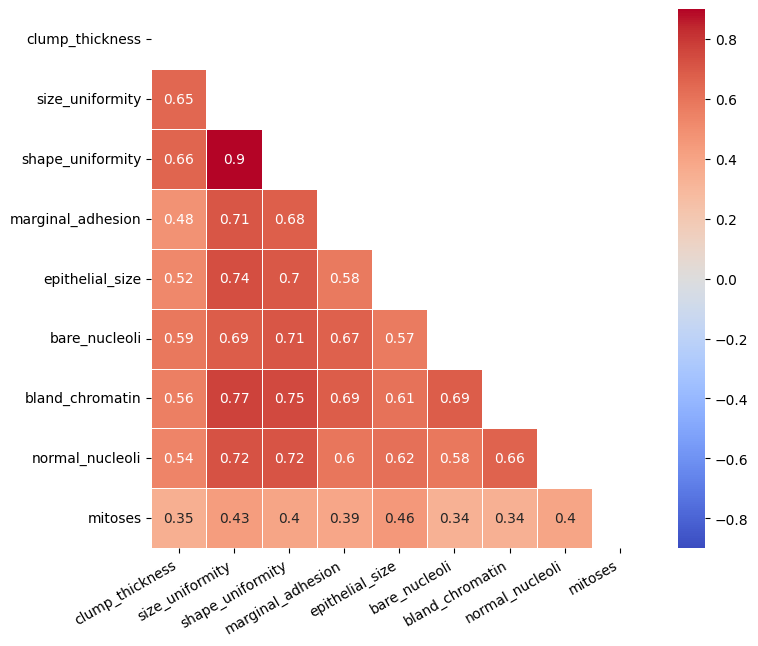

In [6]:
fig, ax = plt.subplots(figsize = [8,7])
corr    = df.corr(numeric_only=True)
matrix  = np.triu(corr)
#--------------------------------------
sns.heatmap(data       = corr, 
            annot      =  True, 
            vmin       = -.9 , 
            vmax       = .9, 
            cmap       = 'coolwarm', 
            mask       = matrix, 
            linewidths = 0.5,
            linecolor  = 'white')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 30, ha = 'right');

 #### Defining Features/Target and train_test_split 
Mitoses column seems to have low correlations with other features. The choice here is 'bland_chromatin', which has the lowest correlation with the 'mitoses' column

In [24]:
 # train_test_split    
df_features = df.loc[:, ['mitoses', 'bland_chromatin']]
df_target   = df.loc[:,'class']

X_train, X_test, y_train, y_test = train_test_split(df_features,                    
                                                    df_target,
                                                    test_size    = 0.1,
                                                    shuffle      = True,
                                                    random_state = 42
                                                    )
print(f"The shapes of the X_train, and y_train are {X_train.shape, y_train.shape} respectively\n {'-- '*25}")
print(f"The shapes of the X_test, and y_test are   {X_test.shape, y_test.shape} respectively\n {'-- '*25}")

The shapes of the X_train, and y_train are ((547, 2), (547,)) respectively
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- 
The shapes of the X_test, and y_test are   ((61, 2), (61,)) respectively
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- 
